<a href="https://colab.research.google.com/github/KU-BIG/KUBIG_2023_SPRING/blob/main/1.%20%EB%B0%A9%ED%95%99%EB%B6%84%EB%B0%98/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/1%EC%A3%BC%EC%B0%A8/1%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%EA%B9%80%EC%97%B0%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

#### 파이토치 시작하기

In [ ]:
import torch

#### Tensor 개념 파악 ( = Array of numerical values(vector, matrix..))
- Tensor는 Array이나 Matrix와 매우 유사한 특수한 자료구조.
- PyTorch에서는 tensor를 사용하여 모델의 입출력과 모델의 매개변수를 부호화(encode).
- GPU 등 다른 연산 가속을 위한 특수 하드웨어에서 실행할 수 있다는 점을 제외하면, numpy의 ndarray와 매우 유사.


#### 텐서 초기화(생성)
- .tensor: 입력한 데이터로부터 직접
- .from_numpy: numpy 배열로부터
- .ones_like / .rand_like: 다른 텐서로부터
- .rand / .ones / .zeros: 무작위 또는 상수 값 사용
 - 이 경우 텐서의 차원을 나타내는 tuple 필요.

#### 텐서 연산
- 인덱싱/슬라이싱, 전치
- cat: 결합 (vs torch.stack)
- mul: 요소별 곱
- matmul: 행렬 곱

4x3 행렬 두개 만들고 행으로 병합, 열로 병합

In [ ]:
X=torch.rand(4, 3) # random value
Y=torch.rand(4, 3)
print(torch.cat([X, Y], dim=0)) # 행으로 병합
print(torch.cat([X, Y], dim=1)) # 열로 병합

tensor([[0.3570, 0.8533, 0.5772],
        [0.3779, 0.7182, 0.3536],
        [0.1761, 0.8483, 0.3040],
        [0.8807, 0.8531, 0.1488],
        [0.6329, 0.3274, 0.7236],
        [0.5177, 0.9194, 0.1363],
        [0.5696, 0.4180, 0.8462],
        [0.2205, 0.3661, 0.9096]])
tensor([[0.3570, 0.8533, 0.5772, 0.6329, 0.3274, 0.7236],
        [0.3779, 0.7182, 0.3536, 0.5177, 0.9194, 0.1363],
        [0.1761, 0.8483, 0.3040, 0.5696, 0.4180, 0.8462],
        [0.8807, 0.8531, 0.1488, 0.2205, 0.3661, 0.9096]])


#### linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!python --version

Python 3.8.16


In [ ]:
torch.__version__

'1.13.0+cu116'

In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5

In [ ]:
!pip show d2l

Name: d2l
Version: 0.17.6
Summary: Dive into Deep Learning
Home-page: https://d2l.ai
Author: D2L Developers
Author-email: d2l.devs@gmail.com
License: MIT-0
Location: /usr/local/lib/python3.8/dist-packages
Requires: jupyter, matplotlib, numpy, pandas, requests
Required-by: 


In [ ]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples): # Generating the dataset
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # torch.normal(mean, std, size=())
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # add the noise term, adjusting to y shape
    return X, y.reshape((-1, 1)) # shape of y into (n, 1)

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000) # applying randomly generating data

In [ ]:
features

tensor([[ 0.2585, -1.1460],
        [-1.4700,  2.1365],
        [ 0.5698, -0.4649],
        ...,
        [ 0.0748,  1.0848],
        [-0.0375,  1.9426],
        [ 1.4865,  0.0981]])

In [ ]:
labels

tensor([[ 8.0075],
        [-2.1068],
        [ 7.9312],
        ...,
        [ 4.0992],
        [ 2.4744],
        [ 9.8072]])

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.2585, -1.1460]) 
label: tensor([8.0075])


#### feature - label 상관관계 확인

In [ ]:
!pip install matplotlib==3.1.3 # version down

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.


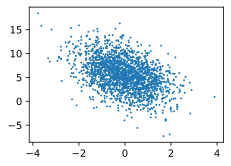

In [ ]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [ ]:
# Reading the dataset(한 minibatch만큼 training process 수행)
def data_iter(batch_size, features, labels): # 효율적인 최적화를 위해 샘플 나누기
    num_examples = len(features)
    indices = list(range(num_examples)) # 0~1999
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size): # range(start, end, step)
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) # [i, i + batch_size] 구간화
        yield features[batch_indices], labels[batch_indices] # yielding minibatches of the size 'batch_size'

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.8628,  0.3360],
        [ 1.8952,  0.0876],
        [-1.3357, -1.6491],
        [ 0.0428, -1.1378],
        [-0.5970,  0.4045],
        [-0.5826, -1.3496],
        [-1.1963,  1.1522],
        [ 0.2043,  0.2132],
        [ 0.5822,  0.6965],
        [-0.0940, -0.5780],
        [-1.5242,  0.0052],
        [-0.1383,  0.8169],
        [-0.7658, -1.2721],
        [-0.2346,  1.5574],
        [-0.4534,  1.0067],
        [-0.3029,  0.4707],
        [ 0.5433, -1.3500],
        [-0.6337,  0.0143],
        [-1.8377,  1.0889],
        [-1.1908,  0.2737]]) 
 tensor([[ 2.4010],
        [11.0642],
        [ 3.9683],
        [ 7.3449],
        [ 3.0902],
        [ 5.7860],
        [ 0.1599],
        [ 5.8132],
        [ 6.1882],
        [ 6.0898],
        [ 0.9153],
        [ 3.8675],
        [ 5.1285],
        [ 2.4639],
        [ 2.6273],
        [ 3.8955],
        [ 9.1584],
        [ 3.5836],
        [-1.6326],
        [ 1.5278]])


In [ ]:
# initializing w, b (fit/train -> update)
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) # requires_grad: 모든 연산 추적(누적 저장)
b = torch.tensor([5.4]) # 원하는 실수 대입

In [ ]:
w

tensor([[ 0.0119],
        [-0.0106]], requires_grad=True)

In [ ]:
b

tensor([5.4000])

tensor에서 requires_grad 속성
- True로 설정 시 모든 연산 과정 추적 가능.
- 계산 완료 후 .backward() 로 모든 기울기 계산 가능.
- tensor의 기울기 값은 .grad() 에 누적.
- tensor의 기록 추적을 중지하려면 .detach() 를 통해 계산 기록으로부터 분리 가능.
- 기록 추적(메모리 사용)을 방지하려면 with torch.no.grad():  
로 코드 블록을 감싸면 됨.

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드, 행렬 곱

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 ###loss function, y를 y_hat의 형태로 변환 후 계산

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad(): # 계산 기록 저장 X
        for param in params: # params: w, b
            param -= lr * param.grad / batch_size # update param in the dir reducing the loss
            param.grad.zero_() # 파이토치에서 .backward() 활용 시 기존 grad를 계속 더함 -> 1 iter 완료 시 grad를 0으로 초기화

#### 용어 정리
- CPU(대학생 1명이 100문제) vs GPU(초등학생 100명이 100문제)  
- batch: GPU가 한 번에 처리하는 데이터 묶음
- batch size: 연산 한 번에 들어가는 데이터의 크기
 - 값이 너무 크다면, 속도 하락과 메모리 부족 발생
 - 값이 너무 작다면, 업데이트가 잦아 최적화 어려움
- mini batch: 1 batch size에 해당하는 데이터셋
- epoch: 모든 학습 데이터셋을 학습하는 횟수(학습 데이터셋에 포함된 모든 데이터들이 한 번씩 모델을 통과한 횟수)
 - 값이 클수록 다양한 random weights로 학습할 수 있어, 적합한 param을 찾을 확률이 높음.
 - 값이 너무 크다면 과적합될 수 있음.
- iteration: 전체 데이터를 모델에 한 번 학습시키는데 필요한 batch의 수
 - 1 epoch 동안 필요한 param 업데이트 횟수 = batch의 수

#### 경사하강법 종류: batch, stochastic, mini-batch stochastic
1. batch(BGD): 전체 학습 데이터를 하나의 배치로(배치 크기가 n) 묶어 학습
 - 경사의 수렴 안정 / 업데이트 횟수 적음, 메모리 사용 많음
2. stochastic(SGD): 전체 데이터 중 단 하나를 이용하여 경사 하강법을 1회 진행(배치 크기가 1)
 - 적은 데이터로 학습 가능, 속도 빠름 / 노이즈가 심해 일반화 어려움
3. MSGD(SGD): SGD와 BGD의 절충안, 전체 데이터를 batch_size 씩 나눠 배치로 학습(배치 크기: 사용자 지정)
 - 예. 전체 데이터: 1000개, batch_size: 100일 때, 총 10묶음의 배치로 나누어 1 Epoch당 10번 경사하강 진행
 - batch_size는 메모리 용량과 시간 고려하여 결정

In [ ]:
lr = 0.01 # learning rate: 학습률(과대/과소적합 고려하여 설정)
num_epochs = 20 # 직접 설정
net = linreg # 위에서 설정한 linear regression model
loss = squared_loss # 위에서 설정한 loss function

w0 = []
w1 = []
loss_w0 = []
loss_w1 = []

for epoch in range(num_epochs): # 전체 데이터 epoch 회 반복학습
    for X, y in data_iter(batch_size, features, labels): # X에 피처, y에 레이블 할당
        l = loss(net(X, w, b), y) # net 으로 y_hat 계산 후 y_hat과 y로 loss 계산
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward() # param에 대한 기울기 계산
        sgd([w], lr, batch_size) # gradient를 계산하기 위한 param은 w, b -> 오류??
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        # For drawing plot
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        loss_w0.append(train_l[0].mean())
        loss_w1.append(train_l[1].mean())

epoch 1, loss 0.771444
epoch 2, loss 0.112228
epoch 3, loss 0.020003
epoch 4, loss 0.007157
epoch 5, loss 0.005322
epoch 6, loss 0.005068
epoch 7, loss 0.005027
epoch 8, loss 0.005023
epoch 9, loss 0.005022
epoch 10, loss 0.005022
epoch 11, loss 0.005022
epoch 12, loss 0.005022
epoch 13, loss 0.005022
epoch 14, loss 0.005022
epoch 15, loss 0.005022
epoch 16, loss 0.005022
epoch 17, loss 0.005022
epoch 18, loss 0.005022
epoch 19, loss 0.005022
epoch 20, loss 0.005022


In [ ]:
w0

[[1.877158284187317],
 [2.579221725463867],
 [2.8430376052856445],
 [2.9414727687835693],
 [2.9789419174194336],
 [2.9926695823669434],
 [2.9987223148345947],
 [3.000450849533081],
 [3.0013492107391357],
 [3.001110553741455],
 [3.002087354660034],
 [3.0018677711486816],
 [3.0022993087768555],
 [3.002192497253418],
 [3.00162672996521],
 [3.002094030380249],
 [3.001281261444092],
 [3.001599073410034],
 [3.0014724731445312],
 [3.0011584758758545]]

In [ ]:
w1

[[-0.9547941088676453],
 [-1.3022379875183105],
 [-1.429902195930481],
 [-1.4765475988388062],
 [-1.4939452409744263],
 [-1.5000382661819458],
 [-1.5025697946548462],
 [-1.5029102563858032],
 [-1.5031858682632446],
 [-1.5037118196487427],
 [-1.5034863948822021],
 [-1.503455400466919],
 [-1.5036602020263672],
 [-1.5031013488769531],
 [-1.5036379098892212],
 [-1.50351083278656],
 [-1.5038717985153198],
 [-1.5032013654708862],
 [-1.5033074617385864],
 [-1.502739667892456]]

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0012,  0.0027], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.1000])


+cost graph 그리기 (x축 w, y축 loss)

Text(0, 0.5, 'loss')

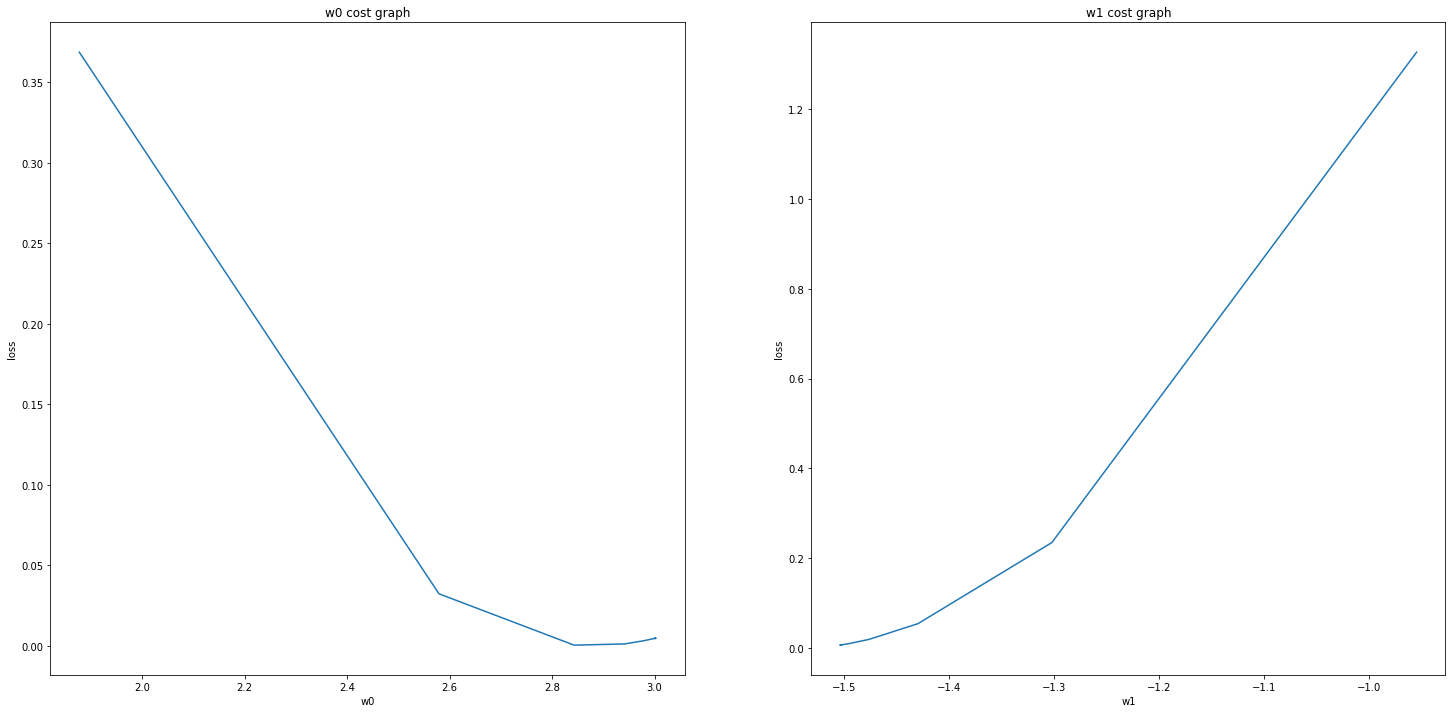

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))

ax1.plot(w0, loss_w0)
ax1.set_title('w0 cost graph')
ax1.set_xlabel('w0')
ax1.set_ylabel('loss')

ax2.plot(w1, loss_w1)
ax2.set_title('w1 cost graph')
ax2.set_xlabel('w1')
ax2.set_ylabel('loss')
# w0와 w1을 모두 추가하여 3차원 그래프 그리는 방법?

#### concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
# Reading the dataset
def load_array(data_arrays, batch_size, is_train=True): # is_train: data iterator object shuffle the data (or not)
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays) # tensor 입력 받아 dataset 형태로 반환
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # dataset을 그대로 사용하지 않고, mini-batch 및 shuffle 기능을 추가하여 로딩

batch_size = 20
data_iter = load_array((features, labels), batch_size) # data_array: (features, labels)

In [ ]:
next(iter(data_iter)) # 첫 minibatch 출력 -> 직접 생성한 함수와 유사한 결과

[tensor([[ 1.0194,  2.2593],
         [-1.5215,  0.0259],
         [ 0.2956, -1.5578],
         [-0.8121, -0.7512],
         [ 2.1225,  0.9717],
         [ 1.3154, -2.1368],
         [-0.9219, -0.9047],
         [-1.0903, -0.1391],
         [-0.2009,  1.2211],
         [-3.1747,  2.1063],
         [ 1.8658,  0.7814],
         [-1.7873, -1.1760],
         [ 1.6733, -1.0368],
         [ 0.9476,  0.6655],
         [ 0.7456, -0.3378],
         [-0.5798,  0.0797],
         [-0.8653,  0.2190],
         [-0.2372,  0.5495],
         [ 0.1578, -0.3859],
         [-0.1708, -0.1901]]), tensor([[ 5.1727],
         [ 0.9128],
         [ 8.7386],
         [ 4.1917],
         [10.4029],
         [12.6468],
         [ 4.0993],
         [ 2.4368],
         [ 3.0560],
         [-7.1800],
         [ 9.9173],
         [ 1.8995],
         [12.0658],
         [ 7.3447],
         [ 8.2359],
         [ 3.6435],
         [ 2.5848],
         [ 3.9586],
         [ 6.5601],
         [ 5.2707]])]

- iter: 파이썬 iterator 생성
- next: iterator의 첫 그룹 선택

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) # nn.Linear: 선형회귀(fully-connected layer) 구현, 2개 입력하여 1개 출력
# Sequential 클래스: nn.Linear, nn.ReLU 등 여러 layer를 묶어 연산(multiple layer)
# 위의 예시에서는 하나의 layer만 존재하므로 필요는 없음

In [ ]:
# Initializing Model Parameters
net[0].weight.data.normal_(0, 0.01) # net[0]: first layer(nn.Linear(2, 1))
net[0].bias.data.fill_(0) # normal_, fill_: replace methods
# Linear(2, 1)에서 input, output dim이 정해졌으므로, layer를 특정할 수 있음

tensor([0.])

In [ ]:
loss = nn.MSELoss() # api function으로 설정

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01) # net.parameters(): 최적화된 param 도출, 딕셔너리 형태의 hyperparam 도출

MSGD 과정
- net(X)로 y_hat 계산 후, loss 계산(forward propagation)
- gradients 계산(running backpropagation)
- 결과 반영하여 파라미터 update

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) # y_hat & y
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.697423
epoch 2, loss 0.012054
epoch 3, loss 0.000310


In [ ]:
w = net[0].weight.data # 학습 결과 w
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data # 학습 결과 b
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0039, -0.0069])
error in estimating b: tensor([0.0122])
